In [1]:
import pandas as pd  # also install lxml
import requests
import polaris as po
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
results_dict = {
    "polaris/pkis2-ret-wt-cls-v2": 0.5525029342676401,
    "polaris/adme-fang-solu-1": 0.6142498915460659,
    "polaris/adme-fang-rppb-1": 0.8335134896602288,
    "polaris/adme-fang-hppb-1": 0.8725363811381532,
    "polaris/adme-fang-perm-1": 0.7727097246303251,
    "polaris/adme-fang-rclint-1": 0.6864046621198829,
    "polaris/adme-fang-hclint-1": 0.6529197177295473,
    "tdcommons/clearance-microsome-az": 0.5757365102478065,
    "tdcommons/dili": 0.8991304347826086,
    "tdcommons/bioavailability-ma": 0.610575324243432,
    "tdcommons/vdss-lombardo": 0.5374770573505254,
    "tdcommons/herg": 0.8764359351988218
}

In [3]:
chemprop_results = {
    "polaris/pkis2-ret-wt-cls-v2": 0.4022174328484946,
    "polaris/adme-fang-solu-1": 0.5962083321846253,
    "polaris/adme-fang-rppb-1": 0.22811751509425005,
    "polaris/adme-fang-hppb-1": 0.5839256862476387,
    "polaris/adme-fang-perm-1": 0.6860496540025689,
    "polaris/adme-fang-rclint-1": 0.6993555044203762,
    "polaris/adme-fang-hclint-1": 0.6587254331645709,
    "tdcommons/clearance-microsome-az": 0.4447433483975412,
    "tdcommons/dili": 0.9086956521739131,
    "tdcommons/bioavailability-ma": 0.5839707349517792,
    "tdcommons/vdss-lombardo": 0.47940850366929666,
    "tdcommons/herg": 0.6846833578792342
}

In [4]:
fastprop_results = {
    "polaris/pkis2-ret-wt-cls-v2": 0.5694927443665828,
    "polaris/adme-fang-solu-1": 0.5401840084292533,
    "polaris/adme-fang-rppb-1": 0.7619337388626671,
    "polaris/adme-fang-hppb-1": 0.5255383512140337,
    "polaris/adme-fang-perm-1": 0.7495456490144543,
    "polaris/adme-fang-rclint-1": 0.024598238503027083,
    "polaris/adme-fang-hclint-1": 0.6380389767780245,
    "tdcommons/clearance-microsome-az": 0.37788390466263777,
    "tdcommons/dili": 0.8869565217391304,
    "tdcommons/bioavailability-ma": 0.6744263385433987,
    "tdcommons/vdss-lombardo": 0.47489729368571043,
    "tdcommons/herg": 0.839322533136966
}

In [5]:
best_models = {}

In [6]:
metadata = {}

In [7]:
for benchmark_name in results_dict.keys():
    benchmark = po.load_benchmark(benchmark_name)
    response = requests.get(f'https://polarishub.io/benchmarks/{benchmark_name}')
    results_table = pd.read_html(response.text)[0]
    best = results_table[benchmark.main_metric.label][0]
    if isinstance(best, str):
        best = 0.0
    best_models[benchmark_name] = best
    metadata[benchmark_name] = {
        "metric": benchmark.main_metric.label,
        "best_name": results_table['Name'][0],
    }

/home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/rich/live.py:231: UserWarning: install 
"ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

[2025-04-03 22:40:28] INFO     The version of Polaris that was used to create the artifact (dev) is ]8;id=155848;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/_artifact.py\_artifact.py]8;;\:]8;id=779155;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/_artifact.py#92\92]8;;\
                               different from the currently installed version of Polaris (0.11.10).                

                      INFO     To verify the checksum, we need to recompute it. This can be slow    ]8;id=48289;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/mixins/_checksum.py\_checksum.py]8;;\:]8;id=964709;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/mixins/_checksum.py#67\67]8;;\
                               for large datasets.                                                                 

/home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/rich/live.py:231: UserWarning: install 
"ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

[22:40:28]  Success: Fetching dataset                                                                 ]8;id=599920;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/utils/context.py\context.py]8;;\:]8;id=740727;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/utils/context.py#53\53]8;;\

                      INFO     The version of Polaris that was used to create the artifact (dev) is ]8;id=756472;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/_artifact.py\_artifact.py]8;;\:]8;id=629037;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/_artifact.py#92\92]8;;\
                               different from the currently installed version of Polaris (0.11.10).                

                      WARNING  No checksum to verify against. Specify either the md5sum parameter   ]8;id=117064;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/mixins/_checksum.py\_checksum.py]8;;\:]8;id=647504;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/mixins/_checksum.py#60\60]8;;\
                               or store the checksum in the dataset.md5sum attribute.                              

            Success: Fetching benchmark                                                               ]8;id=249510;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/utils/context.py\context.py]8;;\:]8;id=655532;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/utils/context.py#53\53]8;;\

/home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/rich/live.py:231: UserWarning: install 
"ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

/tmp/ipykernel_2078044/3571253189.py:4: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  results_table = pd.read_html(response.text)[0]


[2025-04-03 22:40:31] INFO     The version of Polaris that was used to create the artifact (0.0.0)  ]8;id=363562;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/_artifact.py\_artifact.py]8;;\:]8;id=359363;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/_artifact.py#92\92]8;;\
                               is different from the currently installed version of Polaris                        
                               (0.11.10).                                                                          

                      INFO     To verify the checksum, we need to recompute it. This can be slow    ]8;id=868107;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/mixins/_checksum.py\_checksum.py]8;;\:]8;id=318801;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/mixins/_checksum.py#67\67]8;;\
                               for large datasets.                                                                 

/home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/rich/live.py:231: UserWarning: install 
"ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

[22:40:31]  Success: Fetching dataset                                                                 ]8;id=894022;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/utils/context.py\context.py]8;;\:]8;id=503475;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/utils/context.py#53\53]8;;\

                      INFO     The version of Polaris that was used to create the artifact (0.0.0)  ]8;id=138456;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/_artifact.py\_artifact.py]8;;\:]8;id=159010;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/_artifact.py#92\92]8;;\
                               is different from the currently installed version of Polaris                        
                               (0.11.10).                                                                          

                      WARNING  No checksum to verify against. Specify either the md5sum parameter   ]8;id=869732;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/mixins/_checksum.py\_checksum.py]8;;\:]8;id=327062;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/mixins/_checksum.py#60\60]8;;\
                               or store the checksum in the dataset.md5sum attribute.                              

            Success: Fetching benchmark                                                               ]8;id=566214;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/utils/context.py\context.py]8;;\:]8;id=934728;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/utils/context.py#53\53]8;;\

/home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/rich/live.py:231: UserWarning: install 
"ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

/tmp/ipykernel_2078044/3571253189.py:4: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  results_table = pd.read_html(response.text)[0]


[2025-04-03 22:40:33] INFO     The version of Polaris that was used to create the artifact (0.0.0)  ]8;id=942897;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/_artifact.py\_artifact.py]8;;\:]8;id=305084;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/_artifact.py#92\92]8;;\
                               is different from the currently installed version of Polaris                        
                               (0.11.10).                                                                          

                      INFO     To verify the checksum, we need to recompute it. This can be slow    ]8;id=734184;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/mixins/_checksum.py\_checksum.py]8;;\:]8;id=975597;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/mixins/_checksum.py#67\67]8;;\
                               for large datasets.                                                                 

/home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/rich/live.py:231: UserWarning: install 
"ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

[22:40:33]  Success: Fetching dataset                                                                 ]8;id=474994;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/utils/context.py\context.py]8;;\:]8;id=191973;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/utils/context.py#53\53]8;;\

                      INFO     The version of Polaris that was used to create the artifact (0.0.0)  ]8;id=949742;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/_artifact.py\_artifact.py]8;;\:]8;id=282443;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/_artifact.py#92\92]8;;\
                               is different from the currently installed version of Polaris                        
                               (0.11.10).                                                                          

                      WARNING  No checksum to verify against. Specify either the md5sum parameter   ]8;id=440593;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/mixins/_checksum.py\_checksum.py]8;;\:]8;id=270406;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/mixins/_checksum.py#60\60]8;;\
                               or store the checksum in the dataset.md5sum attribute.                              

            Success: Fetching benchmark                                                               ]8;id=504752;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/utils/context.py\context.py]8;;\:]8;id=716578;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/utils/context.py#53\53]8;;\

/home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/rich/live.py:231: UserWarning: install 
"ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

/tmp/ipykernel_2078044/3571253189.py:4: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  results_table = pd.read_html(response.text)[0]


[2025-04-03 22:40:35] INFO     The version of Polaris that was used to create the artifact (0.0.0)  ]8;id=699611;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/_artifact.py\_artifact.py]8;;\:]8;id=327043;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/_artifact.py#92\92]8;;\
                               is different from the currently installed version of Polaris                        
                               (0.11.10).                                                                          

                      INFO     To verify the checksum, we need to recompute it. This can be slow    ]8;id=278755;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/mixins/_checksum.py\_checksum.py]8;;\:]8;id=248954;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/mixins/_checksum.py#67\67]8;;\
                               for large datasets.                                                                 

/home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/rich/live.py:231: UserWarning: install 
"ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

[22:40:35]  Success: Fetching dataset                                                                 ]8;id=672747;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/utils/context.py\context.py]8;;\:]8;id=420607;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/utils/context.py#53\53]8;;\

                      INFO     The version of Polaris that was used to create the artifact (0.0.0)  ]8;id=892556;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/_artifact.py\_artifact.py]8;;\:]8;id=362135;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/_artifact.py#92\92]8;;\
                               is different from the currently installed version of Polaris                        
                               (0.11.10).                                                                          

                      WARNING  No checksum to verify against. Specify either the md5sum parameter   ]8;id=946563;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/mixins/_checksum.py\_checksum.py]8;;\:]8;id=677936;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/mixins/_checksum.py#60\60]8;;\
                               or store the checksum in the dataset.md5sum attribute.                              

            Success: Fetching benchmark                                                               ]8;id=722356;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/utils/context.py\context.py]8;;\:]8;id=938629;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/utils/context.py#53\53]8;;\

/home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/rich/live.py:231: UserWarning: install 
"ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

/tmp/ipykernel_2078044/3571253189.py:4: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  results_table = pd.read_html(response.text)[0]


[2025-04-03 22:40:37] INFO     The version of Polaris that was used to create the artifact (0.0.0)  ]8;id=928730;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/_artifact.py\_artifact.py]8;;\:]8;id=818048;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/_artifact.py#92\92]8;;\
                               is different from the currently installed version of Polaris                        
                               (0.11.10).                                                                          

/home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/rich/live.py:231: UserWarning: install 
"ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

                      INFO     To verify the checksum, we need to recompute it. This can be slow    ]8;id=223115;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/mixins/_checksum.py\_checksum.py]8;;\:]8;id=332753;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/mixins/_checksum.py#67\67]8;;\
                               for large datasets.                                                                 

/home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/rich/live.py:231: UserWarning: install 
"ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

[22:40:37]  Success: Fetching dataset                                                                 ]8;id=555183;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/utils/context.py\context.py]8;;\:]8;id=794748;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/utils/context.py#53\53]8;;\

                      INFO     The version of Polaris that was used to create the artifact (0.0.0)  ]8;id=908658;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/_artifact.py\_artifact.py]8;;\:]8;id=963272;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/_artifact.py#92\92]8;;\
                               is different from the currently installed version of Polaris                        
                               (0.11.10).                                                                          

                      WARNING  No checksum to verify against. Specify either the md5sum parameter   ]8;id=413389;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/mixins/_checksum.py\_checksum.py]8;;\:]8;id=729834;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/mixins/_checksum.py#60\60]8;;\
                               or store the checksum in the dataset.md5sum attribute.                              

            Success: Fetching benchmark                                                               ]8;id=715686;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/utils/context.py\context.py]8;;\:]8;id=159457;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/utils/context.py#53\53]8;;\

/home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/rich/live.py:231: UserWarning: install 
"ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

/tmp/ipykernel_2078044/3571253189.py:4: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  results_table = pd.read_html(response.text)[0]


/home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/rich/live.py:231: UserWarning: install 
"ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

[2025-04-03 22:40:39] INFO     The version of Polaris that was used to create the artifact (0.0.0)  ]8;id=355938;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/_artifact.py\_artifact.py]8;;\:]8;id=50627;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/_artifact.py#92\92]8;;\
                               is different from the currently installed version of Polaris                        
                               (0.11.10).                                                                          

                      INFO     To verify the checksum, we need to recompute it. This can be slow    ]8;id=117727;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/mixins/_checksum.py\_checksum.py]8;;\:]8;id=347292;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/mixins/_checksum.py#67\67]8;;\
                               for large datasets.                                                                 

/home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/rich/live.py:231: UserWarning: install 
"ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

[22:40:39]  Success: Fetching dataset                                                                 ]8;id=525568;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/utils/context.py\context.py]8;;\:]8;id=580845;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/utils/context.py#53\53]8;;\

                      INFO     The version of Polaris that was used to create the artifact (0.0.0)  ]8;id=736953;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/_artifact.py\_artifact.py]8;;\:]8;id=347886;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/_artifact.py#92\92]8;;\
                               is different from the currently installed version of Polaris                        
                               (0.11.10).                                                                          

                      WARNING  No checksum to verify against. Specify either the md5sum parameter   ]8;id=862062;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/mixins/_checksum.py\_checksum.py]8;;\:]8;id=24354;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/mixins/_checksum.py#60\60]8;;\
                               or store the checksum in the dataset.md5sum attribute.                              

            Success: Fetching benchmark                                                               ]8;id=950458;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/utils/context.py\context.py]8;;\:]8;id=622045;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/utils/context.py#53\53]8;;\

/home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/rich/live.py:231: UserWarning: install 
"ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

/tmp/ipykernel_2078044/3571253189.py:4: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  results_table = pd.read_html(response.text)[0]


[2025-04-03 22:40:41] INFO     The version of Polaris that was used to create the artifact (0.0.0)  ]8;id=872567;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/_artifact.py\_artifact.py]8;;\:]8;id=50575;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/_artifact.py#92\92]8;;\
                               is different from the currently installed version of Polaris                        
                               (0.11.10).                                                                          

                      INFO     To verify the checksum, we need to recompute it. This can be slow    ]8;id=506864;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/mixins/_checksum.py\_checksum.py]8;;\:]8;id=662424;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/mixins/_checksum.py#67\67]8;;\
                               for large datasets.                                                                 

/home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/rich/live.py:231: UserWarning: install 
"ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

[22:40:41]  Success: Fetching dataset                                                                 ]8;id=927941;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/utils/context.py\context.py]8;;\:]8;id=307665;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/utils/context.py#53\53]8;;\

                      INFO     The version of Polaris that was used to create the artifact (0.0.0)  ]8;id=907024;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/_artifact.py\_artifact.py]8;;\:]8;id=721891;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/_artifact.py#92\92]8;;\
                               is different from the currently installed version of Polaris                        
                               (0.11.10).                                                                          

                      WARNING  No checksum to verify against. Specify either the md5sum parameter   ]8;id=822264;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/mixins/_checksum.py\_checksum.py]8;;\:]8;id=986567;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/mixins/_checksum.py#60\60]8;;\
                               or store the checksum in the dataset.md5sum attribute.                              

            Success: Fetching benchmark                                                               ]8;id=977251;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/utils/context.py\context.py]8;;\:]8;id=890286;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/utils/context.py#53\53]8;;\

/home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/rich/live.py:231: UserWarning: install 
"ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

/tmp/ipykernel_2078044/3571253189.py:4: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  results_table = pd.read_html(response.text)[0]


[2025-04-03 22:40:43] INFO     The version of Polaris that was used to create the artifact (dev) is ]8;id=619034;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/_artifact.py\_artifact.py]8;;\:]8;id=802246;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/_artifact.py#92\92]8;;\
                               different from the currently installed version of Polaris (0.11.10).                

                      INFO     To verify the checksum, we need to recompute it. This can be slow    ]8;id=603352;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/mixins/_checksum.py\_checksum.py]8;;\:]8;id=240086;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/mixins/_checksum.py#67\67]8;;\
                               for large datasets.                                                                 

/home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/rich/live.py:231: UserWarning: install 
"ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

[22:40:43]  Success: Fetching dataset                                                                 ]8;id=811097;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/utils/context.py\context.py]8;;\:]8;id=273466;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/utils/context.py#53\53]8;;\

                      INFO     The version of Polaris that was used to create the artifact (dev) is ]8;id=408279;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/_artifact.py\_artifact.py]8;;\:]8;id=26356;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/_artifact.py#92\92]8;;\
                               different from the currently installed version of Polaris (0.11.10).                

                      WARNING  No checksum to verify against. Specify either the md5sum parameter   ]8;id=667807;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/mixins/_checksum.py\_checksum.py]8;;\:]8;id=158377;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/mixins/_checksum.py#60\60]8;;\
                               or store the checksum in the dataset.md5sum attribute.                              

            Success: Fetching benchmark                                                               ]8;id=909753;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/utils/context.py\context.py]8;;\:]8;id=490318;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/utils/context.py#53\53]8;;\

/home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/rich/live.py:231: UserWarning: install 
"ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

/tmp/ipykernel_2078044/3571253189.py:4: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  results_table = pd.read_html(response.text)[0]


[2025-04-03 22:40:45] INFO     The version of Polaris that was used to create the artifact (dev) is ]8;id=359969;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/_artifact.py\_artifact.py]8;;\:]8;id=376248;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/_artifact.py#92\92]8;;\
                               different from the currently installed version of Polaris (0.11.10).                

                      INFO     To verify the checksum, we need to recompute it. This can be slow    ]8;id=942241;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/mixins/_checksum.py\_checksum.py]8;;\:]8;id=730276;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/mixins/_checksum.py#67\67]8;;\
                               for large datasets.                                                                 

/home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/rich/live.py:231: UserWarning: install 
"ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

[22:40:45]  Success: Fetching dataset                                                                 ]8;id=118439;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/utils/context.py\context.py]8;;\:]8;id=374307;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/utils/context.py#53\53]8;;\

                      INFO     The version of Polaris that was used to create the artifact (dev) is ]8;id=142466;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/_artifact.py\_artifact.py]8;;\:]8;id=562937;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/_artifact.py#92\92]8;;\
                               different from the currently installed version of Polaris (0.11.10).                

                      WARNING  No checksum to verify against. Specify either the md5sum parameter   ]8;id=246131;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/mixins/_checksum.py\_checksum.py]8;;\:]8;id=537971;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/mixins/_checksum.py#60\60]8;;\
                               or store the checksum in the dataset.md5sum attribute.                              

            Success: Fetching benchmark                                                               ]8;id=568904;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/utils/context.py\context.py]8;;\:]8;id=198681;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/utils/context.py#53\53]8;;\

/home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/rich/live.py:231: UserWarning: install 
"ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

/tmp/ipykernel_2078044/3571253189.py:4: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  results_table = pd.read_html(response.text)[0]


[2025-04-03 22:40:47] INFO     The version of Polaris that was used to create the artifact (dev) is ]8;id=450342;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/_artifact.py\_artifact.py]8;;\:]8;id=249303;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/_artifact.py#92\92]8;;\
                               different from the currently installed version of Polaris (0.11.10).                

                      INFO     To verify the checksum, we need to recompute it. This can be slow    ]8;id=112031;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/mixins/_checksum.py\_checksum.py]8;;\:]8;id=557464;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/mixins/_checksum.py#67\67]8;;\
                               for large datasets.                                                                 

/home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/rich/live.py:231: UserWarning: install 
"ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

[22:40:47]  Success: Fetching dataset                                                                 ]8;id=811609;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/utils/context.py\context.py]8;;\:]8;id=155515;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/utils/context.py#53\53]8;;\

                      INFO     The version of Polaris that was used to create the artifact (dev) is ]8;id=549258;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/_artifact.py\_artifact.py]8;;\:]8;id=199974;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/_artifact.py#92\92]8;;\
                               different from the currently installed version of Polaris (0.11.10).                

                      WARNING  No checksum to verify against. Specify either the md5sum parameter   ]8;id=114802;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/mixins/_checksum.py\_checksum.py]8;;\:]8;id=127267;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/mixins/_checksum.py#60\60]8;;\
                               or store the checksum in the dataset.md5sum attribute.                              

            Success: Fetching benchmark                                                               ]8;id=25789;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/utils/context.py\context.py]8;;\:]8;id=825157;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/utils/context.py#53\53]8;;\

/home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/rich/live.py:231: UserWarning: install 
"ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

/tmp/ipykernel_2078044/3571253189.py:4: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  results_table = pd.read_html(response.text)[0]


[2025-04-03 22:40:49] INFO     The version of Polaris that was used to create the artifact (dev) is ]8;id=839543;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/_artifact.py\_artifact.py]8;;\:]8;id=680324;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/_artifact.py#92\92]8;;\
                               different from the currently installed version of Polaris (0.11.10).                

                      INFO     To verify the checksum, we need to recompute it. This can be slow    ]8;id=454676;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/mixins/_checksum.py\_checksum.py]8;;\:]8;id=900139;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/mixins/_checksum.py#67\67]8;;\
                               for large datasets.                                                                 

/home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/rich/live.py:231: UserWarning: install 
"ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

[22:40:49]  Success: Fetching dataset                                                                 ]8;id=829201;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/utils/context.py\context.py]8;;\:]8;id=579864;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/utils/context.py#53\53]8;;\

                      INFO     The version of Polaris that was used to create the artifact (dev) is ]8;id=579285;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/_artifact.py\_artifact.py]8;;\:]8;id=52817;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/_artifact.py#92\92]8;;\
                               different from the currently installed version of Polaris (0.11.10).                

                      WARNING  No checksum to verify against. Specify either the md5sum parameter   ]8;id=676039;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/mixins/_checksum.py\_checksum.py]8;;\:]8;id=770522;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/mixins/_checksum.py#60\60]8;;\
                               or store the checksum in the dataset.md5sum attribute.                              

            Success: Fetching benchmark                                                               ]8;id=609407;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/utils/context.py\context.py]8;;\:]8;id=360598;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/utils/context.py#53\53]8;;\

/home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/rich/live.py:231: UserWarning: install 
"ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

/tmp/ipykernel_2078044/3571253189.py:4: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  results_table = pd.read_html(response.text)[0]


[2025-04-03 22:40:52] INFO     The version of Polaris that was used to create the artifact (dev) is ]8;id=661763;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/_artifact.py\_artifact.py]8;;\:]8;id=76345;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/_artifact.py#92\92]8;;\
                               different from the currently installed version of Polaris (0.11.10).                

                      INFO     To verify the checksum, we need to recompute it. This can be slow    ]8;id=772605;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/mixins/_checksum.py\_checksum.py]8;;\:]8;id=687519;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/mixins/_checksum.py#67\67]8;;\
                               for large datasets.                                                                 

/home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/rich/live.py:231: UserWarning: install 
"ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

[22:40:52]  Success: Fetching dataset                                                                 ]8;id=535615;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/utils/context.py\context.py]8;;\:]8;id=250891;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/utils/context.py#53\53]8;;\

                      INFO     The version of Polaris that was used to create the artifact (dev) is ]8;id=303883;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/_artifact.py\_artifact.py]8;;\:]8;id=147758;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/_artifact.py#92\92]8;;\
                               different from the currently installed version of Polaris (0.11.10).                

                      WARNING  No checksum to verify against. Specify either the md5sum parameter   ]8;id=758122;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/mixins/_checksum.py\_checksum.py]8;;\:]8;id=497443;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/mixins/_checksum.py#60\60]8;;\
                               or store the checksum in the dataset.md5sum attribute.                              

            Success: Fetching benchmark                                                               ]8;id=292789;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/utils/context.py\context.py]8;;\:]8;id=840582;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/utils/context.py#53\53]8;;\

/tmp/ipykernel_2078044/3571253189.py:4: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  results_table = pd.read_html(response.text)[0]


## Comparison against local benchmarks

In [8]:
df = pd.DataFrame.from_dict({"ChemProp": chemprop_results, "fastprop": fastprop_results, "fastfound": results_dict})

--- Ranks per Benchmark (1 = Best, using metadata) ---
                                  ChemProp  fastprop  fastfound
polaris/pkis2-ret-wt-cls-v2            3.0       1.0        2.0
polaris/adme-fang-solu-1               2.0       3.0        1.0
polaris/adme-fang-rppb-1               3.0       2.0        1.0
polaris/adme-fang-hppb-1               2.0       3.0        1.0
polaris/adme-fang-perm-1               3.0       2.0        1.0
polaris/adme-fang-rclint-1             1.0       3.0        2.0
polaris/adme-fang-hclint-1             1.0       3.0        2.0
tdcommons/clearance-microsome-az       2.0       3.0        1.0
tdcommons/dili                         1.0       3.0        2.0
tdcommons/bioavailability-ma           3.0       1.0        2.0
tdcommons/vdss-lombardo                2.0       3.0        1.0
tdcommons/herg                         3.0       2.0        1.0


--- Average Place (Rank) per Model (Lower is Better) ---
fastfound    1.416667
ChemProp     2.166667
fastprop  

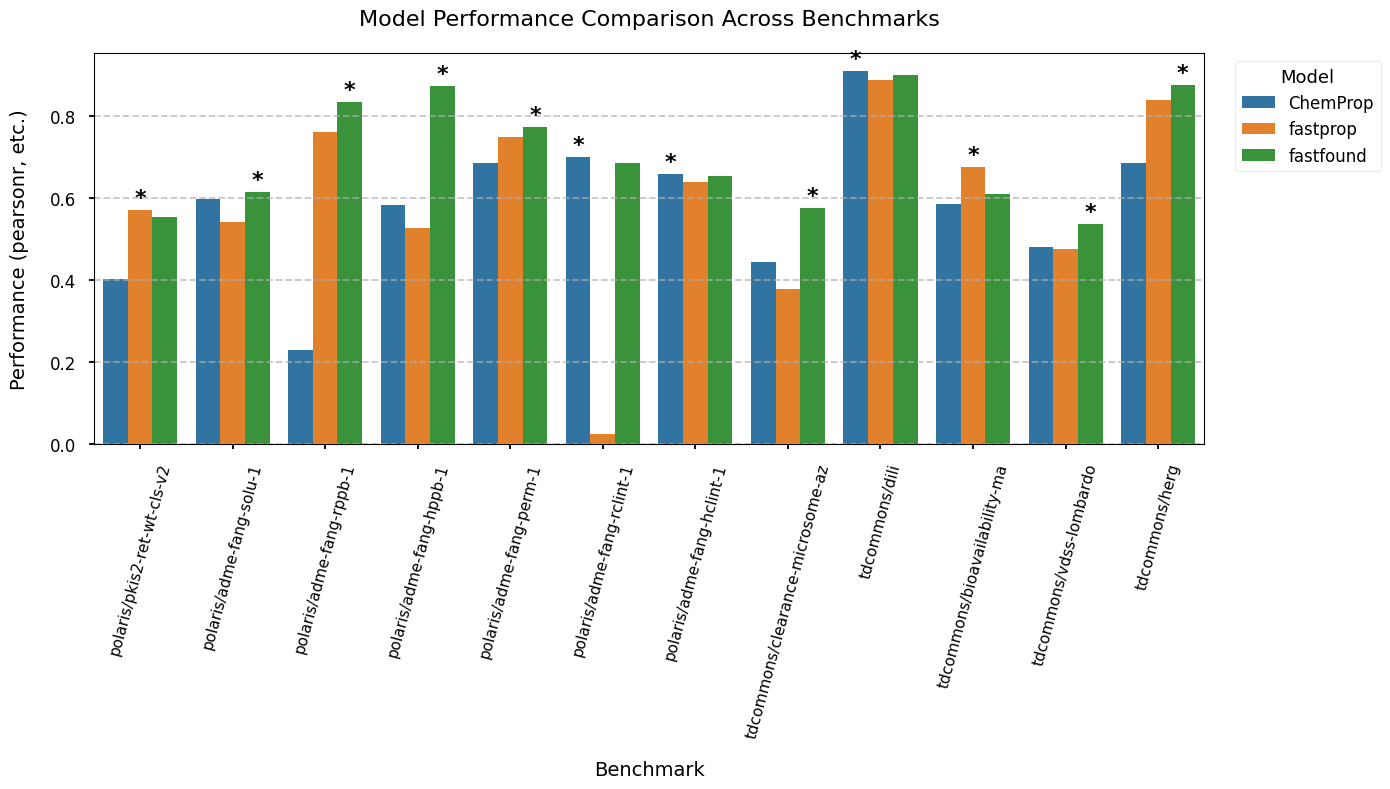

In [9]:
# --- 2. Define Metric Properties ---
# Define which metrics are better when higher
HIGHER_IS_BETTER_METRICS = {'roc_auc', 'pr_auc', 'pearsonr', 'spearmanr', 'accuracy', 'f1'}
# Add any other metrics where higher values are better
# Metrics not in this set will be assumed to have lower values as better (e.g., rmse, mae)

def get_ascending_for_metric(metric_name):
    """
    Determines if ranking should be ascending for a given metric.
    rank(ascending=False) means higher values get lower ranks (rank 1).
    rank(ascending=True) means lower values get lower ranks (rank 1).
    Returns the value for the 'ascending' parameter in pandas rank.
    """
    return metric_name not in HIGHER_IS_BETTER_METRICS

# --- 3. Calculate Performance Statistics ---

# 3.2. Calculate Ranks per Benchmark (using metadata)
def rank_row(row):
    benchmark_name = row.name
    if benchmark_name not in metadata:
        print(f"Warning: Benchmark '{benchmark_name}' not found in metadata. Skipping ranking.")
        return pd.Series([np.nan] * len(row), index=row.index) # Return NaNs if no metadata

    metric = metadata[benchmark_name].get('metric')
    if not metric:
         print(f"Warning: Metric not found for benchmark '{benchmark_name}' in metadata. Skipping ranking.")
         return pd.Series([np.nan] * len(row), index=row.index) # Return NaNs if no metric

    ascending = get_ascending_for_metric(metric)
    # method='min' assigns the minimum rank to tied models
    return row.rank(ascending=ascending, method='min')

# Apply the ranking function row-wise
ranks = df.apply(rank_row, axis=1)
print("--- Ranks per Benchmark (1 = Best, using metadata) ---")
print(ranks)
print("\n" + "="*30 + "\n")

# 3.3. Calculate Average Place (Average Rank) per Model
# Drop benchmarks that couldn't be ranked (if any NaNs occurred) before calculating mean
average_place = ranks.dropna(axis=0, how='all').mean(axis=0).sort_values()
print("--- Average Place (Rank) per Model (Lower is Better) ---")
print(average_place)
print("\n" + "="*30 + "\n")

# 3.4. (Optional) Count Number of #1 Finishes per Model
first_place_finishes = (ranks == 1).sum(axis=0).sort_values(ascending=False)
print("--- Number of #1 Finishes per Model ---")
print(first_place_finishes)
print("\n" + "="*30 + "\n")

# --- 4. Plotting: Grouped Bar Chart with Best Model Indicator ---

# 4.1. Prepare data for plotting (melt the DataFrame)
# We need the metric name for the y-axis label, but it varies.
# Let's use a generic name or pick the most common one.
all_metrics = [m.get('metric', 'N/A') for m in metadata.values()]
most_common_metric = pd.Series(all_metrics).mode()[0] if all_metrics else "Performance Score"
y_axis_label = f"Performance ({most_common_metric}, etc.)" # Indicate mixed metrics

df_melted = df.reset_index().rename(columns={'index': 'Benchmark'})
df_melted = df_melted.melt(id_vars='Benchmark', var_name='Model', value_name='Performance') # Use generic 'Performance'


# 4.2. Create the plot
plt.style.use('seaborn-v0_8-talk')
fig, ax = plt.subplots(figsize=(14, 8)) # Adjust figsize as needed

# Ensure consistent order for models in plot and legend
model_order = df.columns.tolist()

sns.barplot(
    x='Benchmark',
    y='Performance',
    hue='Model',
    data=df_melted,
    ax=ax,
    order=df.index.tolist(), # Ensure benchmark order matches original df
    hue_order=model_order   # Ensure model order matches original df
    # ci=None # Uncomment if you don't want error bars
)

# 4.3. Customize for Publication Quality
ax.set_title('Model Performance Comparison Across Benchmarks', fontsize=16, pad=20)
ax.set_xlabel('Benchmark', fontsize=14, labelpad=15)
ax.set_ylabel(y_axis_label, fontsize=14, labelpad=15)
ax.tick_params(axis='x', rotation=75, labelsize=11) # Rotate x-axis labels more if needed
ax.tick_params(axis='y', labelsize=12)
ax.legend(title='Model', title_fontsize='13', fontsize='12', bbox_to_anchor=(1.02, 1), loc='upper left')
ax.grid(axis='y', linestyle='--', alpha=0.7)

# 4.4 Add Asterisk for Best Model per Benchmark
# Check if ranks DataFrame is not empty
if not ranks.empty:
    models_in_plot = model_order # Use the defined model order
    benchmarks_in_plot = df.index.tolist() # Use the defined benchmark order

    # Map benchmark names to their index in the plot (0, 1, 2...)
    benchmark_indices = {name: i for i, name in enumerate(benchmarks_in_plot)}

    # Iterate through the bar containers (one container per model)
    for model_idx, container in enumerate(ax.containers):
        model_name = models_in_plot[model_idx]

        # Iterate through the bars in this container (one bar per benchmark)
        for bar_idx, bar in enumerate(container):
            # Sometimes bar_idx might not align perfectly if data is missing,
            # It's safer to try and determine benchmark from bar's x position center
            # but let's first assume the simple index mapping works.
            try:
                 # Get the benchmark name corresponding to this bar's index position
                benchmark_name = benchmarks_in_plot[bar_idx]
                benchmark_rank_series = ranks.loc[benchmark_name]

                # Check if the rank exists is 1 for this model and benchmark
                if np.isclose(benchmark_rank_series[model_name], 1.0):
                    # Add asterisk above this bar
                    x_pos = bar.get_x() + bar.get_width() / 2
                    y_pos = bar.get_height()
                    # Add a small offset to y_pos so asterisk isn't touching the bar
                    offset = 0.005 * ax.get_ylim()[1] # Adjust offset as needed
                    ax.text(x_pos, y_pos + offset, '*', ha='center', va='bottom', color='k', fontsize=16, fontweight='bold')
            except IndexError:
                 print(f"Warning: Could not match bar index {bar_idx} to benchmark name. Skipping asterisk.")
            except KeyError:
                 print(f"Warning: Could not find rank for model '{model_name}' or benchmark '{benchmark_name}'. Skipping asterisk.")
else:
    print("Warning: Ranks DataFrame is empty, cannot add best model indicators.")


plt.tight_layout() # Adjust layout

# 4.5. Save the plot (optional)
# plt.savefig('model_performance_comparison_metadata.png', dpi=300, bbox_inches='tight')
# plt.savefig('model_performance_comparison_metadata.pdf', bbox_inches='tight')

# 4.6. Show the plot
plt.show()

## Comparison against SOTA on `polaris`

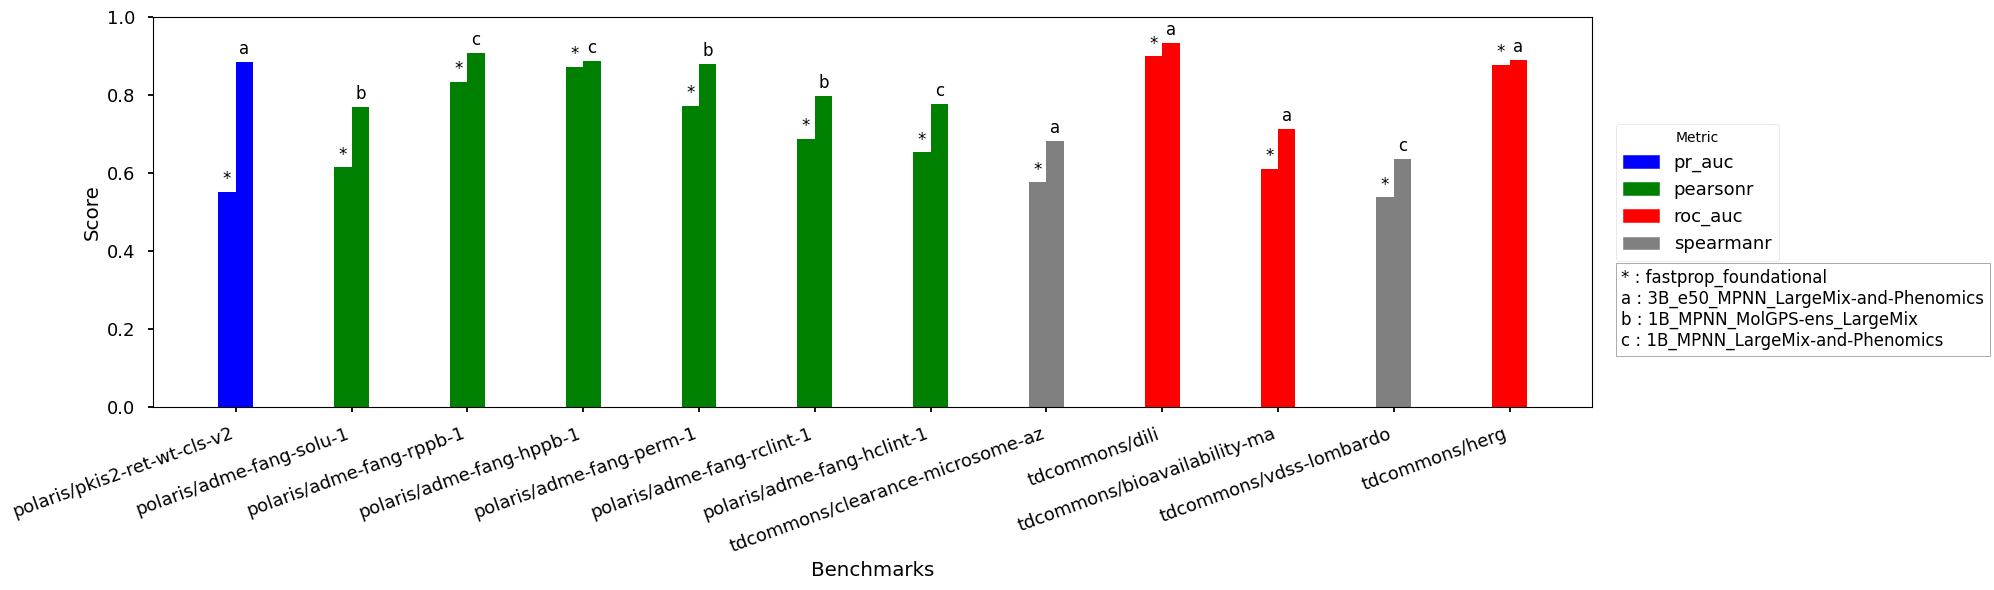

In [10]:
benchmarks = list(metadata.keys())
metrics = [d['metric'] for d in metadata.values()]
sota_name = [d['best_name'] for d in metadata.values()]
developing_values = [results_dict[b] for b in benchmarks]
sota_values = [best_models[b] for b in benchmarks]

# Assigning colors based on the metric
metric_colors = {'pr_auc': 'blue', 'pearsonr': 'green', 'roc_auc': 'red', 'spearmanr': 'grey'}
bar_colors = [metric_colors[metadata[b]['metric']] for b in benchmarks]

# Assign unique symbols for models
model_symbols = {}
model_symbols['fastprop_foundational'] = "*"
syms = iter('abcdefghijklmnopqrstuvwxyz')
for name in sota_name:
    if model_symbols.get(name, None) is None:
        model_symbols[name] = next(syms)

# Bar width and positioning
x = np.arange(len(benchmarks)) * 2  # Increased spacing between groups
width = 0.3 

# Plot bars
fig, ax = plt.subplots(figsize=(20, 6))
bars1 = ax.bar(x - width/2, developing_values, width, label="fastprop_foundation", color=bar_colors)
bars2 = ax.bar(x + width/2, sota_values, width, label="SOTA Model", color=bar_colors)

# Labels and titles
ax.set_xlabel("Benchmarks")
ax.set_ylabel("Score")
ax.set_xticks(x)
ax.set_xticklabels(benchmarks, rotation=20, ha="right")

# Add symbols on top of bars
for bar in bars1:
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.02, model_symbols['fastprop_foundational'], ha='center', fontsize=12, rotation=0)

for bar, model in zip(bars2, sota_name):
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.02, model_symbols[model], ha='center', fontsize=12, rotation=0)

# Legend for metrics
handles = [plt.Rectangle((0,0),1,1, color=color) for color in metric_colors.values()]
metric_labels = list(metric_colors.keys())
ax.legend(handles, metric_labels, title="Metric", bbox_to_anchor=(1.01, 0.75))

# Add symbol lookup legend
symbol_legend = '\n'.join([f"{sym} : {model}" for model, sym in model_symbols.items()])
plt.text(1.02, 0.25, symbol_legend, transform=ax.transAxes, fontsize=12, verticalalignment='center', bbox=dict(facecolor='white', alpha=0.6))

# Show plot
plt.ylim((0.0, 1.0))
plt.tight_layout()
plt.show()